In [1]:
## Exercise 2: Regularized Logistic Regression

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

In [2]:
def plotData(X, y):
    
    pos = X[y == 1]
    neg = X[y == 0]

    plt.plot(pos[:, 0], pos[:, 1], 'k+', linewidth=2, markersize=7)
    plt.plot(neg[:, 0], neg[:, 1], 'ko', markerfacecolor='y', markersize=7)
    

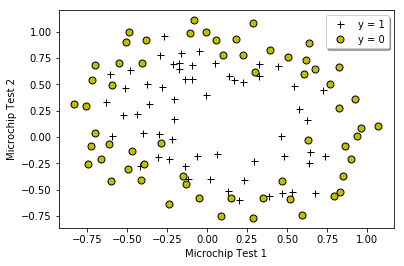

In [3]:
## Load Data
#  The first two columns contains the X values and the third column
#  contains the label (y).

data = np.loadtxt('../ex2/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

plt.figure()
plotData(X, y)

# Put some labels
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend(['y = 1', 'y = 0'], loc='upper right', shadow=True)
None

In [4]:
def mapFeature(X1, X2):
    
    degree = 6
    out = np.ones((np.size(X1), sum(range(degree + 2))))
    
    end = 1
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out[:, end] = X1**(i - j) * X2**j
            end += 1
    
    return out


def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


def costFunctionReg(theta, X, y, lambda_):
    m = len(y)
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    theta_ = np.r_[0, theta[1:]]
    
    J = (np.dot(-y, np.log(h)) - np.dot(1 - y, np.log(1 - h))) / m
    J += lambda_ * np.sum(theta_**2, axis=-1) / (2 * m)
    
    grad = np.dot(h - y, X) / m
    grad += lambda_ * theta_ / m
    
    return J, grad

In [5]:
## Part 1: Regularized Logistic Regression
#  In this part, you are given a dataset with data points that are not
#  linearly separable. However, you would still like to use logistic
#  regression to classify the data points.
#
#  To do so, you introduce more features to use -- in particular, you add
#  polynomial features to our data matrix (similar to polynomial
#  regression).
#

# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:, 0], X[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(np.size(X, 1))

# Set regularization parameter lambda to 1
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

np.set_printoptions(precision=4, suppress=True)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print(' {} '.format(grad[:5]))
print('Expected gradients (approx) - first five values only:')
print(' [0.0085 0.0188 0.0001 0.0503 0.0115]')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(np.size(X, 1))
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('\nCost at test theta (with lambda = 10): {:.2f}'.format(cost))
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
print(' {} '.format(grad[:5]))
print('Expected gradients (approx) - first five values only:')
print(' [0.3460 0.1614 0.1948 0.2269 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 [0.0085 0.0188 0.0001 0.0503 0.0115] 
Expected gradients (approx) - first five values only:
 [0.0085 0.0188 0.0001 0.0503 0.0115]

Cost at test theta (with lambda = 10): 3.16
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 [0.346  0.1614 0.1948 0.2269 0.0922] 
Expected gradients (approx) - first five values only:
 [0.3460 0.1614 0.1948 0.2269 0.0922]


In [6]:
def plotDecisionBoundary(theta, X, y):
    
    plotData(X[:, 1:], y)
    
    # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
        
    z = np.zeros((len(u), len(v)))
    # Evaluate z = theta * x over the grid
    for i, u_val in enumerate(u):
        for j, v_val in enumerate(v):
            z[i, j] = np.dot(mapFeature(u_val, v_val), theta)
                                 
    z = z.T
        
    # Plot z = 0
    # Notice you need to specify the range [0, 0]
    plt.contour(u, v, z, levels=[0], linewidths=2)


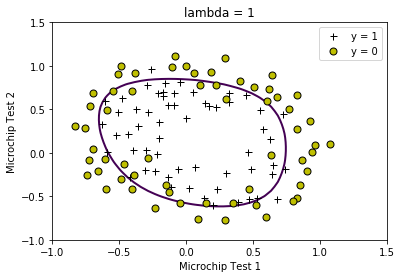

In [7]:
## Part 2: Regularization and Accuracies
#  Optional Exercise:
#  In this part, you will get to try different values of lambda and
#  see how regularization affects the decision coundart
#
#  Try the following values of lambda (0, 1, 10, 100).
#
#  How does the decision boundary change when you vary lambda? How does
#  the training set accuracy vary?
#

# Initialize fitting parameters
initial_theta = np.zeros(np.size(X, 1))

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# Set Options
optimset = {'disp': True, 'maxiter': 400}

# Optimize
result = minimize(lambda t: costFunctionReg(t, X, y, lambda_),
                  initial_theta,
                  method='L-BFGS-B', jac=True, 
                  options=optimset)
theta = result['x']
J = result['fun']

# Plot Boundary
plotDecisionBoundary(theta, X, y)
plt.title('lambda = {:g}'.format(lambda_))

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
None

In [8]:
def predict(theta, X):
    m = len(X)
    
    p = np.zeros(m)
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    p[h >= 0.5] = 1
    
    return p

In [9]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {:.1f}'.format(np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy: 83.1
Expected accuracy (with lambda = 1): 83.1 (approx)


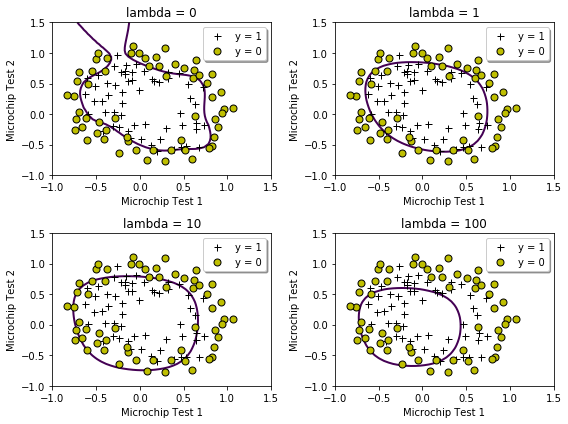

In [11]:
lambda_vals = (0, 1, 10, 100)

fig = plt.figure(figsize=(8, 6))
for i, lambda_ in enumerate(lambda_vals):
    initial_theta = np.zeros(np.size(X, 1))
    
    result = minimize(lambda t: costFunctionReg(t, X, y, lambda_), 
                      initial_theta, 
                      method='L-BFGS-B', jac=True, 
                      options=optimset)
    theta = result['x']
    
    fig.add_subplot(2, 2, i + 1)
    plotDecisionBoundary(theta, X, y)
    plt.title('lambda = {:g}'.format(lambda_))
    
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0', 'Decision boundary'], shadow=True)
    
plt.tight_layout()